In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('dfmerged.csv')
df.drop('Unnamed: 0', axis = 1, inplace= True)

In [44]:
products = pd.read_csv('products.csv')
products.describe()


,product_id,aisle_id,department_id
count,49688.000000,49688.000000,49688.000000
mean,24844.500000,67.769582,11.728687
std,14343.834425,38.316162,5.850410
min,1.000000,1.000000,1.000000
25%,12422.750000,35.000000,7.000000
50%,24844.500000,69.000000,13.000000
75%,37266.250000,100.000000,17.000000
max,49688.000000,134.000000,21.000000


In [7]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,soft drinks,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,soft drinks,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,soft drinks,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,soft drinks,beverages


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,33819106.0,1.710566e+06,987400.761933,1.0,855413.0,1710660.0,2565587.0,3421083.0
user_id,33819106.0,1.029444e+05,59467.333955,1.0,51435.0,102626.0,154412.0,206209.0
order_number,33819106.0,1.713998e+01,17.498287,1.0,5.0,11.0,24.0,100.0
order_dow,33819106.0,2.737285e+00,2.093296,0.0,1.0,3.0,5.0,6.0
order_hour_of_day,33819106.0,1.343123e+01,4.246149,0.0,10.0,13.0,16.0,23.0
days_since_prior_order,31741038.0,1.136415e+01,8.940500,0.0,5.0,8.0,15.0,30.0
product_id,33819106.0,2.557551e+04,14097.696774,1.0,13519.0,25256.0,37935.0,49688.0
add_to_cart_order,33819106.0,8.367738e+00,7.139540,1.0,3.0,6.0,11.0,145.0
reordered,33819106.0,5.900617e-01,0.491822,0.0,0.0,1.0,1.0,1.0
aisle_id,33819106.0,7.121799e+01,38.198982,1.0,31.0,83.0,107.0,134.0


***First I will plot tables to get a sense of what the data looks like and how columns are distributed***

In [52]:
product_info = df.groupby('product_id')['reordered'].sum().to_frame('p_total_reorders')
purchases = df.groupby('product_id')['order_id'].count().to_frame('p_total_purchases')
product_info = product_info.merge(purchases, on = 'product_id', how= 'left').fillna(0)
product_info['percent_reorder'] = product_info['p_total_reorders']/product_info['p_total_purchases']

product_info.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 1 to 49688
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   p_total_reorders   49685 non-null  int64  
 1   p_total_purchases  49685 non-null  int64  
 2   percent_reorder    49685 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.5 MB


In [55]:
product_info = product_info.merge(products, on='product_id', how='inner')
product_info.sort_values(by = 'product_id', inplace=True)
product_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49685 entries, 0 to 49684
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         49685 non-null  int64  
 1   p_total_reorders   49685 non-null  int64  
 2   p_total_purchases  49685 non-null  int64  
 3   percent_reorder    49685 non-null  float64
 4   product_name       49685 non-null  object 
 5   aisle_id           49685 non-null  int64  
 6   department_id      49685 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 3.0+ MB


In [56]:
departments = pd.read_csv('datasets_4931_7487_departments.csv')

In [57]:
product_info = product_info.merge(departments, on='department_id', how='inner')

In [107]:
product_info.head()

,product_id,p_total_reorders,p_total_purchases,percent_reorder,product_name,aisle_id,department_id,department
0,1,1185,1928,0.614627,Chocolate Sandwich Cookies,61,19,snacks
1,16,2,20,0.100000,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,1442,2252,0.640320,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,384,569,0.674868,Nacho Cheese White Bean Chips,107,19,snacks
4,41,33,52,0.634615,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks


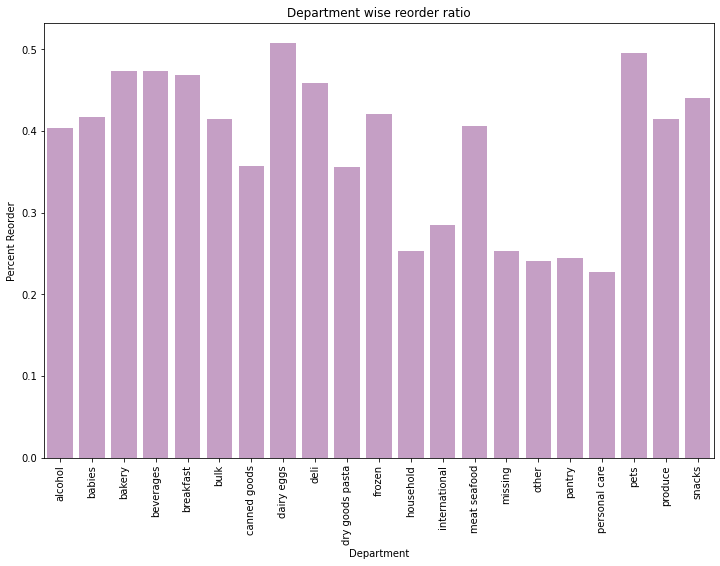

In [113]:
department_reorder = product_info.groupby('department')['percent_reorder'].aggregate('mean').reset_index()
plt.figure(figsize = (12,8))
sns.barplot(department_reorder['department'].values, department_reorder['percent_reorder'].values, color ='purple', alpha=.4)
plt.xlabel('Department')
plt.ylabel('Percent Reorder')
plt.title('Department wise reorder ratio')
plt.xticks(rotation ='vertical')
plt.show()

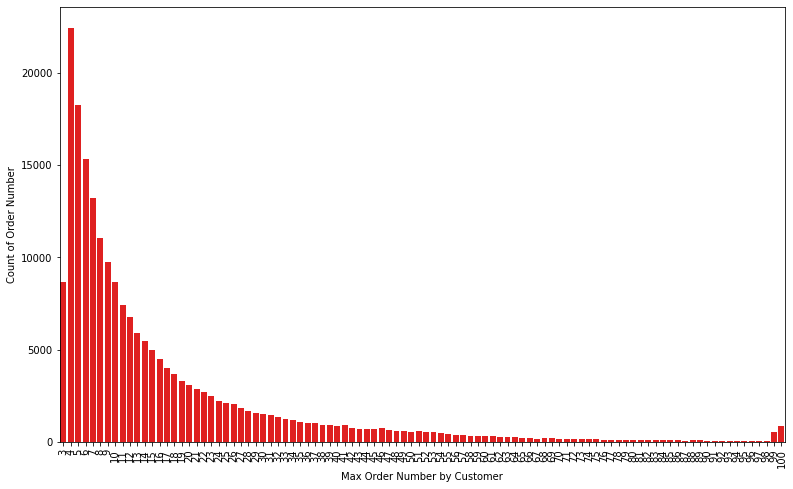

In [63]:
count_max_order = df.groupby('user_id')['order_number'].aggregate(np.max).reset_index()
count_max_order = count_max_order.order_number.value_counts()
plt.figure(figsize = (13, 8))
sns.barplot(count_max_order.index, count_max_order.values, color='red')
plt.xlabel('Max Order Number by Customer')
plt.ylabel('Count of Order Number')
plt.xticks(rotation='vertical')
plt.show()

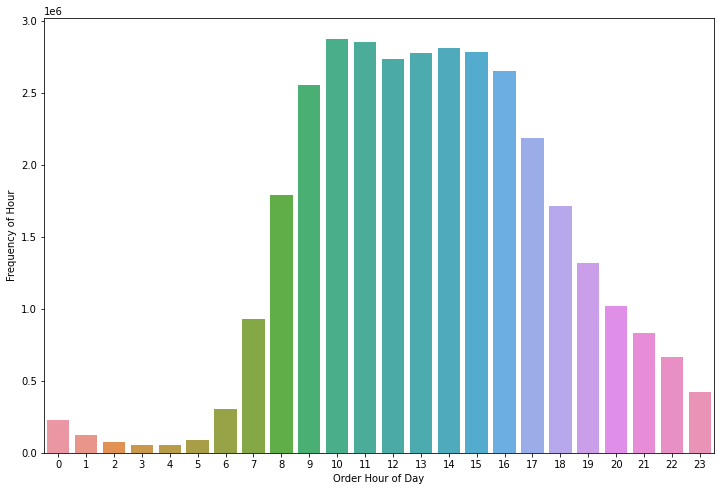

In [64]:
plt.figure(figsize = (12, 8) )
sns.countplot(x = 'order_hour_of_day', data = df)
plt.xlabel('Order Hour of Day')
plt.ylabel('Frequency of Hour')
plt.show()

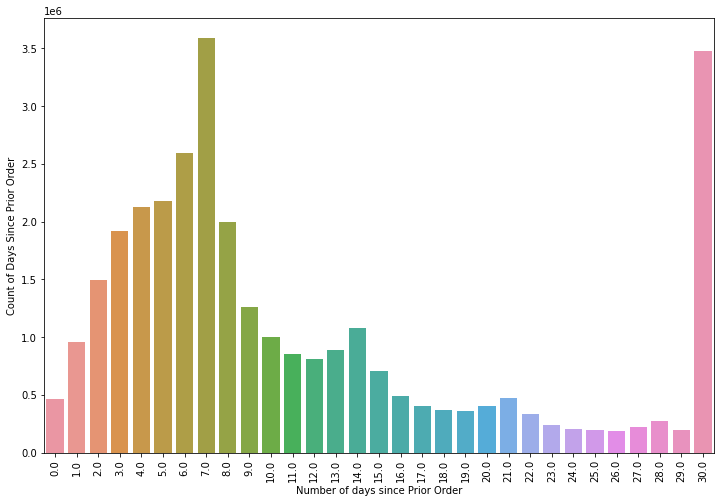

In [66]:
plt.figure(figsize = (12, 8) )
sns.countplot(x = 'days_since_prior_order', data = df)
plt.xlabel('Number of days since Prior Order')
plt.ylabel('Count of Days Since Prior Order')
plt.xticks(rotation = 'vertical')
plt.show()

Looks like the majority of customers order on a weekly or monthly basis. 

In [105]:


user_reorder = df.groupby('user_id')['reordered'].sum()
user_orders = df.groupby('user_id')['order_number'].max().to_frame('total_orders')
user_products = df.groupby('user_id')['order_id'].count().to_frame('total_products')
user_info  = pd.merge(user_reorder, user_orders, on = 'user_id', how='inner')
user_info = user_info.merge(user_products, on = 'user_id', how = 'inner')
user_info['average_order_size'] = round(user_info['total_products'] / user_info['total_orders'],2)
user_info['average_reorder'] = round(user_info['reordered'] / user_info['total_products'],2)
user_info.head()


,reordered,total_orders,total_products,average_order_size,average_reorder
user_id,,,,,
1,51,11,70,6.36,0.73
2,105,15,226,15.07,0.46
3,55,12,88,7.33,0.62
4,1,5,18,3.60,0.06
5,18,5,46,9.20,0.39


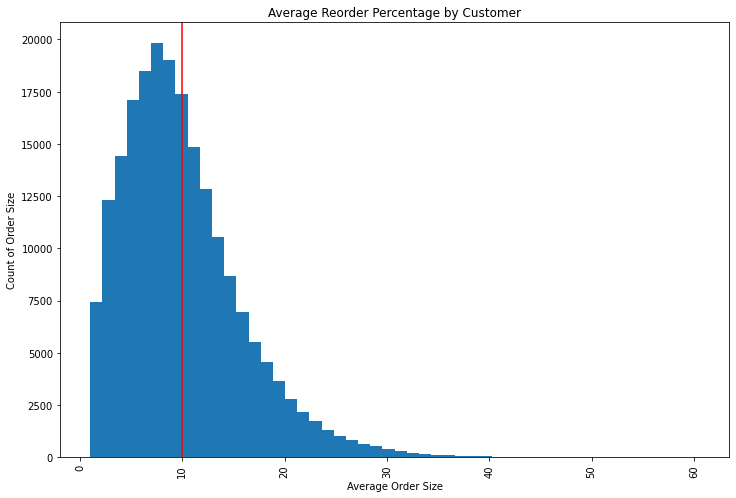

In [115]:
plt.figure(figsize = (12, 8) )
plt.hist(data = user_info, x = 'average_order_size', bins =50)
plt.xlabel('Average Order Size')
plt.ylabel('Count of Order Size')
plt.xticks(rotation = 'vertical')
plt.title('Average Reorder Percentage by Customer')
plt.axvline(np.mean(user_info['average_order_size']), color= 'red')
plt.show()

The average Reorder Percentage by customer has a right tail distribution with a mean of 9.984

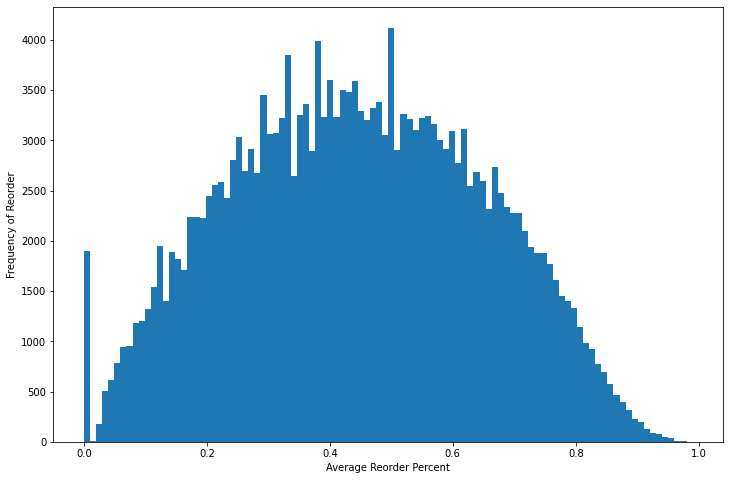

In [97]:
plt.figure(figsize = (12, 8) )
plt.hist(data = user_info, x = 'average_reorder', bins =100, histtype='stepfilled')
plt.xlabel('Average Reorder Percent')
plt.ylabel('Frequency of Reorder')
plt.show()

The average reorder rate of customers is almost naturally distributed. 

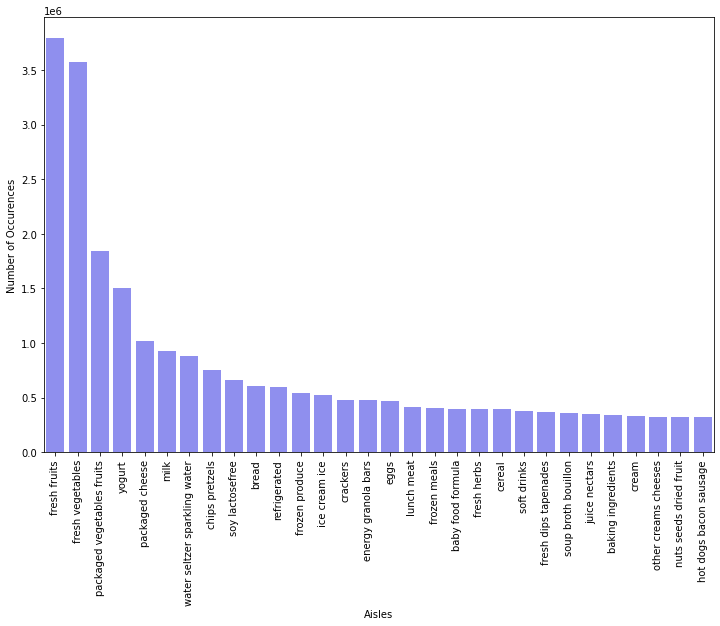

In [102]:
aisle_count = df['aisle'].value_counts().head(30)
plt.figure(figsize = (12, 8) )
sns.barplot(aisle_count.index, aisle_count.values, color ='blue', alpha =.5)
plt.xlabel('Aisles')
plt.ylabel('Number of Occurences')
plt.xticks(rotation = 'vertical')
plt.show()

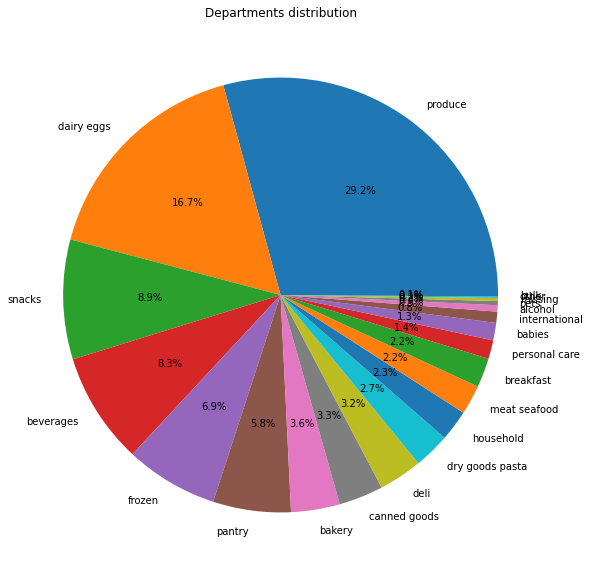

In [104]:
plt.figure(figsize =(10,10))
departments = df['department'].value_counts()
labels = (np.array(departments.index))
sizes = np.array(departments.values)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Departments distribution')
plt.show()

Taking a look at the the categories most sold by aisle and by department. It is clear that produce and dairy/eggs are the most commonly bought items and the aisles reflect the department distribution. 

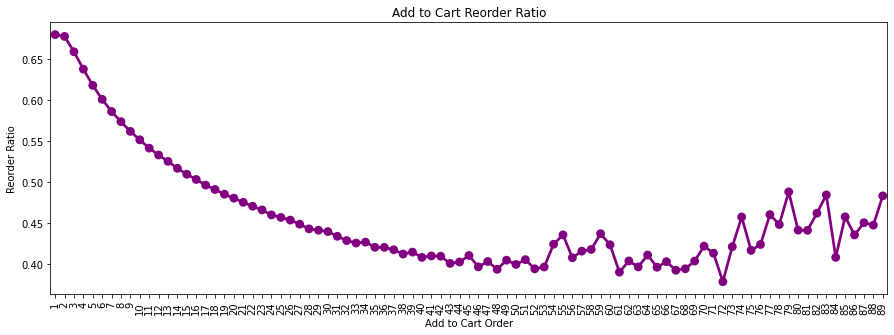

In [132]:


add_to_cart_reorder = df.groupby('add_to_cart_order')['reordered'].aggregate('mean').reset_index()
add_to_cart_reorder = add_to_cart_reorder.loc[add_to_cart_reorder['add_to_cart_order'] < 90]
plt.figure(figsize=(15,5))
sns.pointplot(add_to_cart_reorder['add_to_cart_order'].values, add_to_cart_reorder['reordered'].values, color = 'purple', alpha =.4)
plt.xlabel('Add to Cart Order')
plt.ylabel('Reorder Ratio')
plt.title('Add to Cart Reorder Ratio')
plt.xticks(rotation ='vertical')
plt.show()

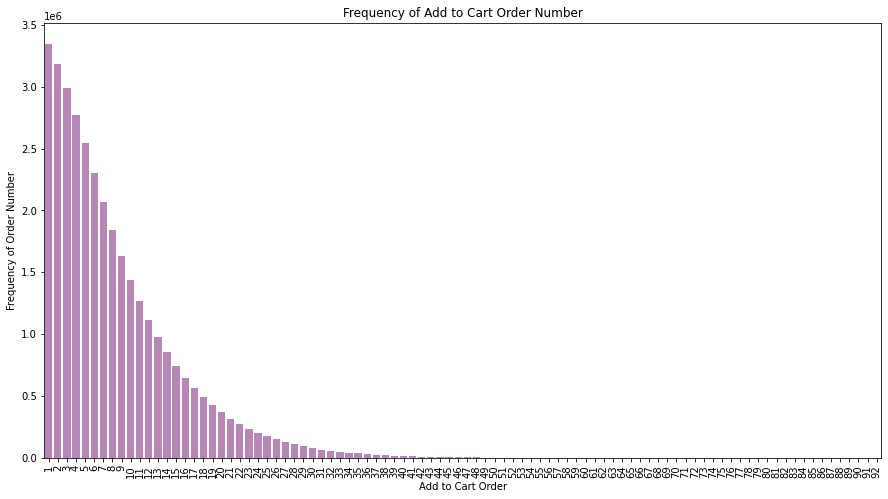

In [129]:
add_to_cart = df['add_to_cart_order'].value_counts()
add_to_cart = add_to_cart.loc[add_to_cart.values > 50]
plt.figure(figsize=(15,8))
sns.barplot(add_to_cart.index, add_to_cart.values, color = 'purple', alpha =.5)
plt.xticks(rotation ='vertical')
plt.xlabel('Add to Cart Order')
plt.ylabel('Frequency of Order Number')
plt.title('Frequency of Add to Cart Order Number')
plt.show()

In [138]:
reordered = df.groupby('reordered')['product_id'].aggregate('count').to_frame('Total_products').reset_index()
reordered['Ratios'] = reordered['Total_products'].apply(lambda x : x / reordered['Total_products'].sum())
reordered

,reordered,Total_products,Ratios
0,0,13863746,0.409938
1,1,19955360,0.590062


59% of items ordered are previously ordered by customers. 

In [146]:
product_info = product_info.sort_values(['percent_reorder'], ascending=False)
product_info.head(20)


,product_id,p_total_reorders,p_total_purchases,percent_reorder,product_name,aisle_id,department_id,department
45380,6433,65,69,0.942029,Raw Veggie Wrappers,13,20,deli
20292,2075,84,90,0.933333,Serenity Ultimate Extrema Overnight Pads,126,11,personal care
15499,43553,12,13,0.923077,Orange Energy Shots,64,7,beverages
3490,27740,94,102,0.921569,Chocolate Love Bar,45,19,snacks
33415,14609,32,35,0.914286,Soy Powder Infant Formula,92,18,babies
49230,13875,41,45,0.911111,Simply Sleep Nighttime Sleep Aid,6,2,other
15196,39992,20,22,0.909091,"Energy Shot, Grape Flavor",64,7,beverages
46657,5868,27,30,0.900000,Russian River Valley Reserve Pinot Noir,28,5,alcohol
10159,36543,62,69,0.898551,Bars Peanut Butter,88,13,pantry
3288,26093,60,67,0.895522,Soy Crisps Lightly Salted,107,19,snacks


Since there are very few orders that go beyond 70, the reorder ratio was getting skewed compared to the order numbers with high frequency. We can see that the reorder ratio is highest at the first few items and gradually lessens as people add more items to their cart. This makes sense since people tend to pick the items they get consistently first when shopping. 

***Second I will begin to explore the relationships between the data a bit more***

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'order_id'),
  Text(0, 1.5, 'user_id'),
  Text(0, 2.5, 'order_number'),
  Text(0, 3.5, 'order_dow'),
  Text(0, 4.5, 'order_hour_of_day'),
  Text(0, 5.5, 'days_since_prior_order'),
  Text(0, 6.5, 'product_id'),
  Text(0, 7.5, 'add_to_cart_order'),
  Text(0, 8.5, 'reordered'),
  Text(0, 9.5, 'aisle_id'),
  Text(0, 10.5, 'department_id')])

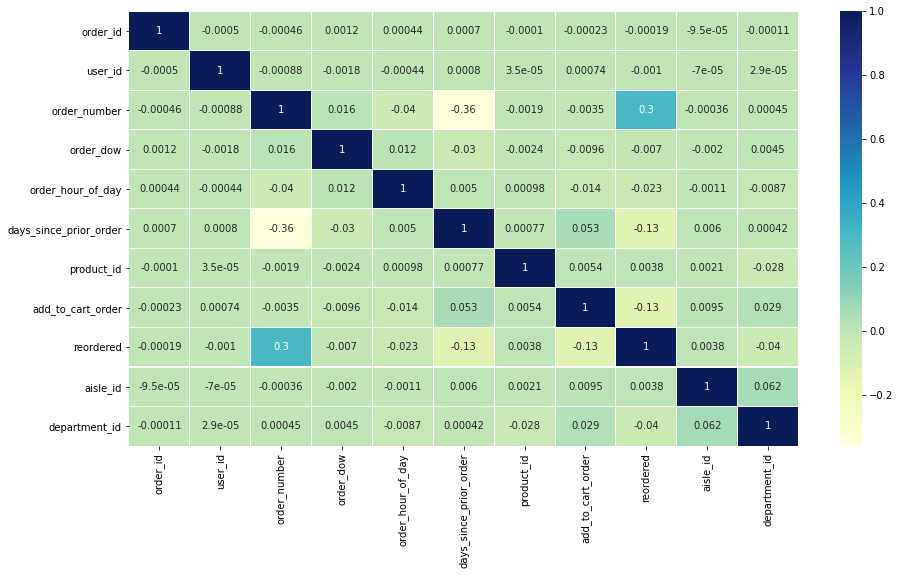

In [133]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)